In [49]:
import numpy as np
def qDefect(n, coeff):
    modifiedRRcoef = np.zeros(6)
    modifiedRRcoef[0:len(coeff)] = coeff
    defect = (
        modifiedRRcoef[0]
        + modifiedRRcoef[1] / ((n - modifiedRRcoef[0]) ** 2)
        + modifiedRRcoef[2] / ((n - modifiedRRcoef[0]) ** 4)
        + modifiedRRcoef[3] / ((n - modifiedRRcoef[0]) ** 6)
        + modifiedRRcoef[4] / ((n - modifiedRRcoef[0]) ** 8)
        + modifiedRRcoef[5] / ((n - modifiedRRcoef[0]) ** 10)
    )
    return defect
qDefect(99, [2.64115, 0.295])

2.6411817715790247

In [51]:
%matplotlib ipympl


import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np  # Import Numerical Python
from IPython.display import display, HTML  # Import HTML for formatting output
import pandas as pd
from scipy.spatial.transform import Rotation as R
from arc import *  # Import ARC (Alkali Rydberg Calculataor)

import pickle


calc = StarkMap(Rubidium87())
calc.set_cache()
calc.defineBasis(98, 2, 2.5, 0.5, 95, 101, 10,  compressedBasis=False)

0

In [57]:
offset = {tuple([99, 1, 3/2]): 18}


Ectrl = 84
Eres = 104
angle_res  = 22
alpha = 0.73
angle_psi = 0*np.pi/180

ycomp = Eres*np.cos(angle_res*np.pi/180)
zcomp = Eres*np.sin(angle_res*np.pi/180)
E_res_vec = np.array([0, ycomp, zcomp])
rot_axis = np.array([0, 1, 0])
r = R.from_rotvec(angle_psi * rot_axis)
E_res_vec = r.as_matrix() @ E_res_vec
E_Total = E_res_vec -  np.array([0, Ectrl*alpha, 0])
angle_theta = np.arccos(np.dot(np.array([0,0, 1]), E_Total)/np.linalg.norm(E_Total))
proj_plane = np.concatenate((np.array(E_Total[0:2]),[0]))
proj_plane = proj_plane/np.linalg.norm(proj_plane)
angle_phi = np.arccos(np.dot(np.array([1,0, 0]), proj_plane)/np.linalg.norm(proj_plane))
E_calc = np.linalg.norm(E_Total)/10

calcSet = StarkMap(Rubidium87())
calcSet.set_cache()
calcSet.defineBasis(98, 2, 2.5, 0.5, 95, 101, 10,  compressedBasis=False,  offset = offset)
calcSet.diagonalise(Earray = E_calc,Barray = [0e-5], theta=angle_theta,phi = angle_phi,  drivingFromState=[0, 1, 1.5, 1.5,1])


[99, 1, 1.5]
[99, 1, 1.5]
[99, 1, 1.5]
[99, 1, 1.5]


In [65]:
df0 = calcSet.displayLevels(units='ghz', displayAll = True)
df0

[Rb87] = 
 Bz = 0.00 G, E = 0.0524 V/cm, angle = 42.0229 


,Energy [GHz],dE [MHz],State,Overlap
0,-354.471636,0.000000e+00,"0.29[99, 1, 0.5, 0.5]-0.60[99, 1, 0.5, -0.5]...",1
1,-349.657781,4.813855e+03,"0.00[97, 4, 4.5, -3.5]+0.31[97, 4, 4.5, -4.5]-...",1
2,-349.657781,4.813855e+03,"0.29[97, 4, 4.5, 3.5]-0.17[97, 4, 4.5, 4.5]+0....",1
3,-349.657781,4.813855e+03,"0.21[97, 4, 3.5, -2.5]-0.27[97, 4, 3.5, -3.5]+...",1
4,-349.657781,4.813855e+03,"0.00[97, 4, 3.5, 2.5]+0.34[97, 4, 3.5, 3.5]-0....",1
...,...,...,...,...
121,-354.358348,1.132876e+02,"0.09[99, 1, 1.5, 1.5]-0.54[99, 1, 1.5, 0.5]-0....",1
122,-354.358348,1.132876e+02,"0.11[99, 1, 1.5, -1.5]+0.53[99, 1, 1.5, -0.5]-...",1
123,-354.367590,1.040465e+02,"0.72[99, 1, 1.5, -0.5]+0.00[99, 1, 1.5, -1.5]-...",1
124,-354.367590,1.040465e+02,"-0.15[99, 1, 1.5, 0.5]+0.55[99, 1, 1.5, 1.5]+0...",1


In [4]:
RES_mol = 2.227945 
RETcond = RET(calcSet, RES_mol)

refE = RETcond.find_energy_state(98, 2, level = -1)[0]
print(refE)
sols = RETcond.find_energy(99, 1, Eref = -refE)

resUpper = 193.5
resLoc = (((296388.255 - resUpper/1000) - sols) - 296385.550)*1000


print(resLoc)
print([i[0] for i in sols])


352.1462192134173
[[155.63949011]
 [155.82606674]
 [254.29570657]
 [254.99443343]
 [267.6720735 ]
 [268.13961234]]
[2.3558605099090073, 2.3556739332678376, 2.257204293455004, 2.256505566592807, 2.2438279265155643, 2.2433603876937696]


In [5]:

calcSet.atom.getQuantumDefect(99, 1, 3/2)


2.6417054719243778

# Calibrate Offset

In [6]:
%matplotlib ipympl


import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np  # Import Numerical Python
from IPython.display import display, HTML  # Import HTML for formatting output
import pandas as pd
from scipy.spatial.transform import Rotation as R
from arc import *  # Import ARC (Alkali Rydberg Calculataor)

import pickle


calc = StarkMap(Rubidium87())
calc.set_cache()
calc.defineBasis(98, 2, 2.5, 0.5, 95, 101, 10,  compressedBasis=False)

0

In [7]:
offset = {tuple([99, 1, 3/2]): 0}
quantumDefect = {tuple([1, 3/2]): 2.6394}#2.6402
# Paper: Quasiclassical theory of quantum defect and spectrum of highly excited rubidium atoms
#quantumDefect = {tuple([1, 3/2]): 2.63876, tuple([0, 1/2]): 3.13095, tuple([1, 1/2]): 2.65197, tuple([2, 3/2]): 1.34851, tuple([2, 5/2]): 1.34688}

Ectrl_ref = 84
Eres = 104
angle_res  = 22
alpha = 0.73
angle_psi = 55*np.pi/180

ycomp = Eres*np.cos(angle_res*np.pi/180)
zcomp = Eres*np.sin(angle_res*np.pi/180)
E_res_vec = np.array([0, ycomp, zcomp])
rot_axis = np.array([0, 1, 0])
r = R.from_rotvec(angle_psi * rot_axis)
E_res_vec = r.as_matrix() @ E_res_vec
E_Total = E_res_vec -  np.array([0, Ectrl_ref*alpha, 0])
angle_theta = np.arccos(np.dot(np.array([0,0, 1]), E_Total)/np.linalg.norm(E_Total))
proj_plane = np.concatenate((np.array(E_Total[0:2]),[0]))
proj_plane = proj_plane/np.linalg.norm(proj_plane)
angle_phi = np.arccos(np.dot(np.array([1,0, 0]), proj_plane)/np.linalg.norm(proj_plane))
E_calc = np.linalg.norm(E_Total)/10

calcRef = StarkMap(Rubidium87())
calcRef.set_cache()
calcRef.defineBasis(98, 2, 2.5, 0.5, 95, 101, 10,  compressedBasis=False,  offset = offset, quantumDefect = quantumDefect)
calcRef.diagonalise(Earray = E_calc,Barray = [2e-4], theta=angle_theta,phi = angle_phi,  drivingFromState=[0, 1, 1.5, 1.5,1])

RES_mol = 2.227945 
RETcond = RET(calcRef, RES_mol)

refE = RETcond.find_energy_state(98, 2, level = -1, debug =False)[0]
dataPk = {78: [280, 289], 90: [293, 301], 70: [270, 281], 60: [255, 266]}
for key in dataPk: 
    dataPk[key] = -refE - ((296388.255 - 0.193016) - (np.array(dataPk[key])/1000 + 296385.550))
print(refE)

352.1427840249997


In [8]:
Ectrl_array = np.concatenate((np.linspace(60, 94, 5), np.array([key for key in dataPk])))
#Ectrl_array = np.array([key for key in dataPk])
E_calc_array = np.zeros(len(Ectrl_array))
angle_phi_array = np.zeros(len(Ectrl_array))
angle_theta_array = np.zeros(len(Ectrl_array))

for ind, Ectrl in enumerate(Ectrl_array): 
    ycomp = Eres*np.cos(angle_res*np.pi/180)
    zcomp = Eres*np.sin(angle_res*np.pi/180)
    E_res_vec = np.array([0, ycomp, zcomp])
    rot_axis = np.array([0, 1, 0])
    r = R.from_rotvec(angle_psi * rot_axis)
    E_res_vec = r.as_matrix() @ E_res_vec
    E_Total = E_res_vec -  np.array([0, Ectrl*alpha, 0])
    angle_theta_array[ind] = np.arccos(np.dot(np.array([0,0, 1]), E_Total)/np.linalg.norm(E_Total))
    proj_plane = np.concatenate((np.array(E_Total[0:2]),[0]))
    proj_plane = proj_plane/np.linalg.norm(proj_plane)
    angle_phi_array[ind] = np.arccos(np.dot(np.array([1,0, 0]), proj_plane)/np.linalg.norm(proj_plane))
    E_calc_array[ind] = np.linalg.norm(E_Total)/10
calcSet = StarkMap(Rubidium87())
calcSet.set_cache()
calcSet.defineBasis(99, 1, 1.5, 0.5, 95, 101, 10,  compressedBasis=False,  offset = offset, quantumDefect = quantumDefect)
calcSet.diagonalise(Earray = E_calc_array,Barray = [0e-5], theta=angle_phi_array,phi = angle_theta_array,  drivingFromState=[0, 1, 1.5, 1.5,1])



[-354.37476803 -354.36576803]
[-354.36176803 -354.35376803]
[-354.38476803 -354.37376803]
[-354.39976803 -354.38876803]


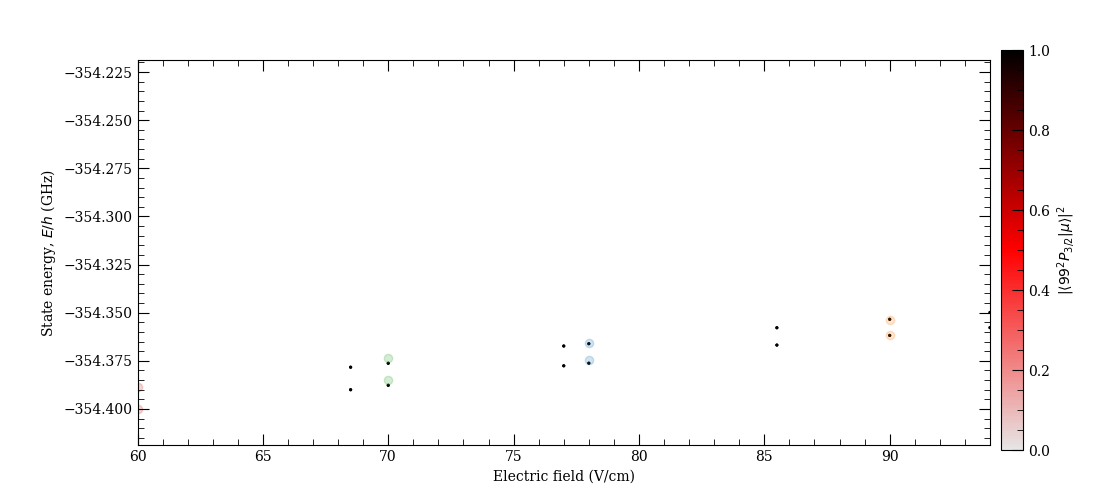

In [9]:
offSet = 0
setPoint = 0.2
calcSet.plotLevelDiagram(units='ghz', ylim = 0.1, displayAll =True, x_vals= Ectrl_array)
for key, value in dataPk.items(): 
    print(value-offSet)
    calcSet.ax.scatter(key*np.ones(len(value)), value - offSet, alpha = setPoint)
    
plt.show(calcSet.ax)
    

# Scan E

In [10]:
%matplotlib ipympl


import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np  # Import Numerical Python
from IPython.display import display, HTML  # Import HTML for formatting output
import pandas as pd
from scipy.spatial.transform import Rotation as R
from arc import *  # Import ARC (Alkali Rydberg Calculataor)

import pickle


calc = StarkMap(Rubidium87())
calc.set_cache()
calc.defineBasis(98, 2, 2.5, 0.5, 95, 101, 10,  compressedBasis=False)

0

In [32]:
Ectrl_s = np.linspace(20, 90, 120)
angle_scan_theta = np.zeros(len(Ectrl_s))
angle_scan_phi = np.zeros(len(Ectrl_s))
angle_psi = 0*np.pi/180


E_scan_total = np.zeros(len(Ectrl_s))
angle_res = 22
alpha = 0.73
Eres = 104


for ind, E_i in enumerate(Ectrl_s): 
    
    ycomp = Eres*np.cos(angle_res*np.pi/180)
    zcomp = Eres*np.sin(angle_res*np.pi/180)

    
    E_res_vec = np.array([0, ycomp, zcomp])
    rot_axis = np.array([0, 1, 0])
    r = R.from_rotvec(angle_psi * rot_axis)
    E_res_vec = r.as_matrix() @ E_res_vec

    E_Total = E_res_vec -  np.array([0, E_i*alpha, 0])
    
    angle_scan_theta[ind] = np.arccos(np.dot(np.array([0,0, 1]), E_Total)/np.linalg.norm(E_Total))
    proj_plane = np.concatenate((np.array(E_Total[0:2]),[0]))
    proj_plane = proj_plane/np.linalg.norm(proj_plane)
    angle_scan_phi[ind] = np.arccos(np.dot(np.array([1,0, 0]), proj_plane)/np.linalg.norm(proj_plane))

    E_scan_total[ind] = np.linalg.norm(E_Total)/10


In [33]:
import pickle

offset = {tuple([99, 1, 3/2]): 16}

calc = StarkMap(Rubidium87())
calc.set_cache()
calc.defineBasis(98, 2, 2.5, 0.5, 95, 101, 10,  compressedBasis=False, offset = offset)
calc.diagonalise(Earray = E_scan_total,Barray = [2e-4], theta=angle_scan_theta,phi = angle_scan_phi,  drivingFromState=[0, 1, 1.5, 1.5,1])

[99, 1, 1.5]
[99, 1, 1.5]
[99, 1, 1.5]
[99, 1, 1.5]


In [34]:
RES_mol = 2.227945 
#RES_mol = 2.226
RETcond = RET(calc, RES_mol)
sols = RETcond.find_resonance(98, 2)

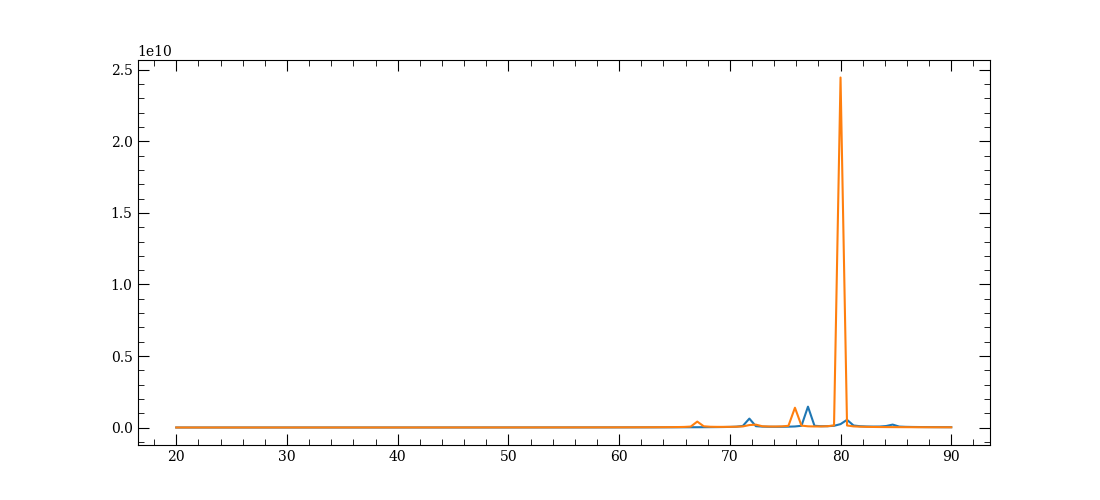

In [48]:
plt.clf()
convFac = 1e6
debugOutput = False
indOI = [0, 1]
for iters, key in enumerate(reversed(sols)): 
    if iters in indOI:
        comp, e_ans = sols[key]
        if debugOutput: 
            print(comp[len(comp) -1])
            print(e_ans[0, : ])
            print(e_ans[1, : ]*convFac)
            print(Ectrl[np.argmin(np.abs(e_ans[1, : ]*convFac))])
            print(np.argmin(np.abs(e_ans[1, : ]*convFac)))
        plt.plot(Ectrl_s, (e_ans[2, : ])*convFac)
        
    
    
plt.show()

In [ ]:
[72, 77, 81, 85]